In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Data/Tesla Dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3504,2024-05-31,178.500000,180.320007,173.820007,178.080002,178.080002,67314600
3505,2024-06-03,178.130005,182.639999,174.490005,176.289993,176.289993,68568900
3506,2024-06-04,174.779999,177.759995,174.000000,174.770004,174.770004,60056300
3507,2024-06-05,175.350006,176.149994,172.130005,175.000000,175.000000,57614800
3508,2024-06-06,174.419998,176.919998,172.729996,175.440002,175.440002,29887849


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3509 non-null   object 
 1   Open       3509 non-null   float64
 2   High       3509 non-null   float64
 3   Low        3509 non-null   float64
 4   Close      3509 non-null   float64
 5   Adj Close  3509 non-null   float64
 6   Volume     3509 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 192.0+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
print(df["Date"].head())

0   2010-06-29
1   2010-06-30
2   2010-07-01
3   2010-07-02
4   2010-07-06
Name: Date, dtype: datetime64[ns]


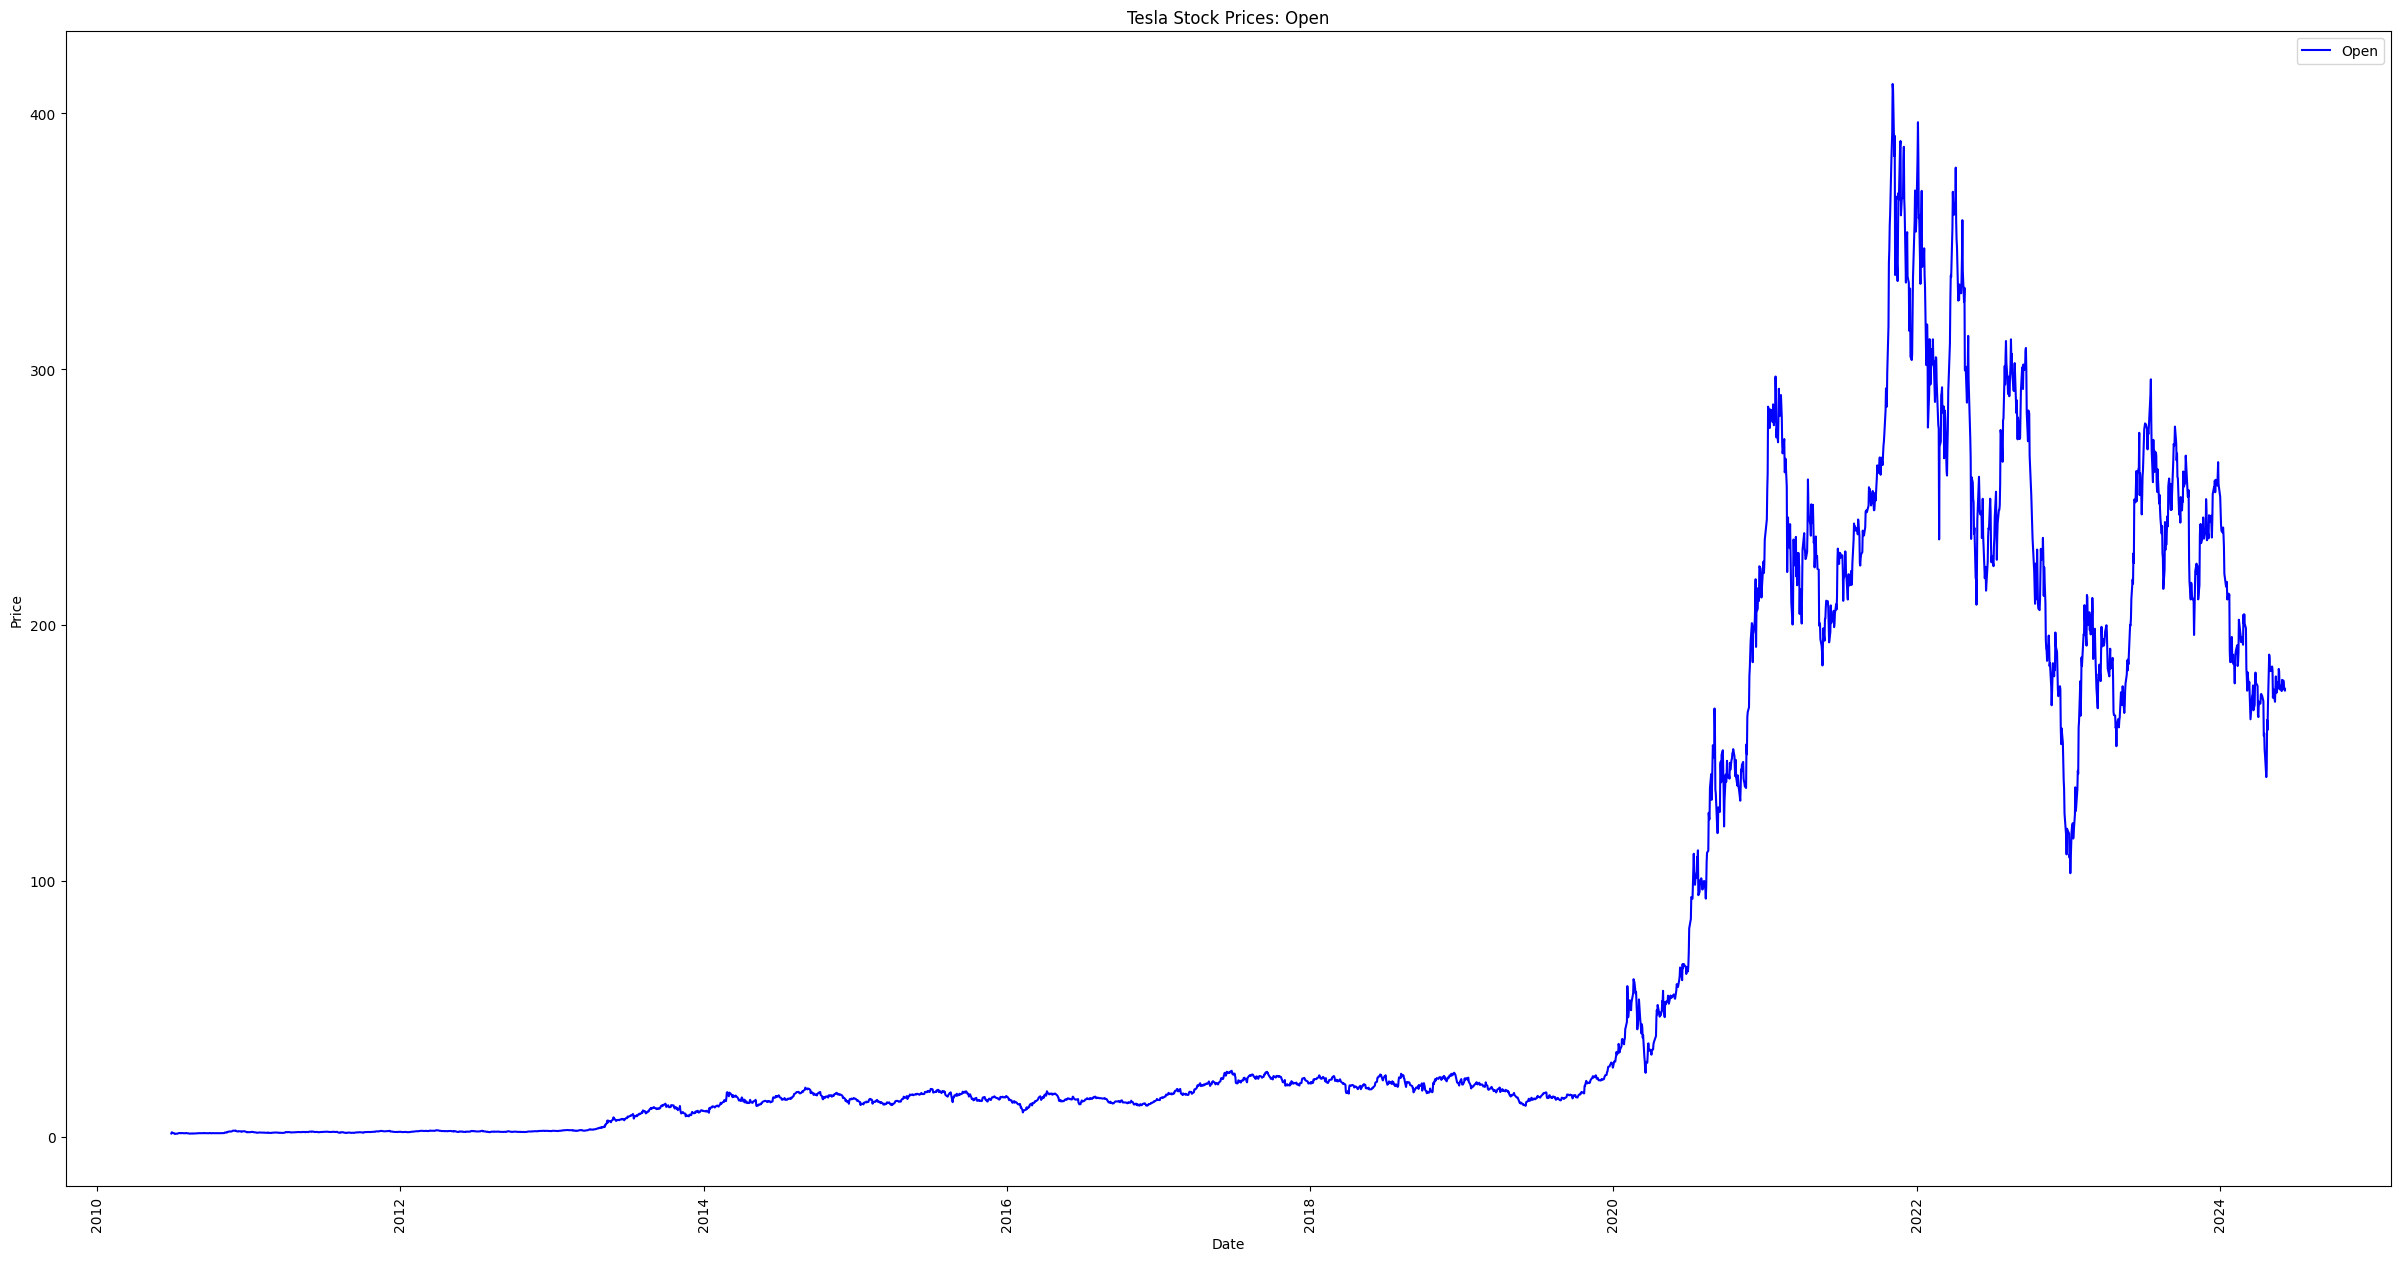

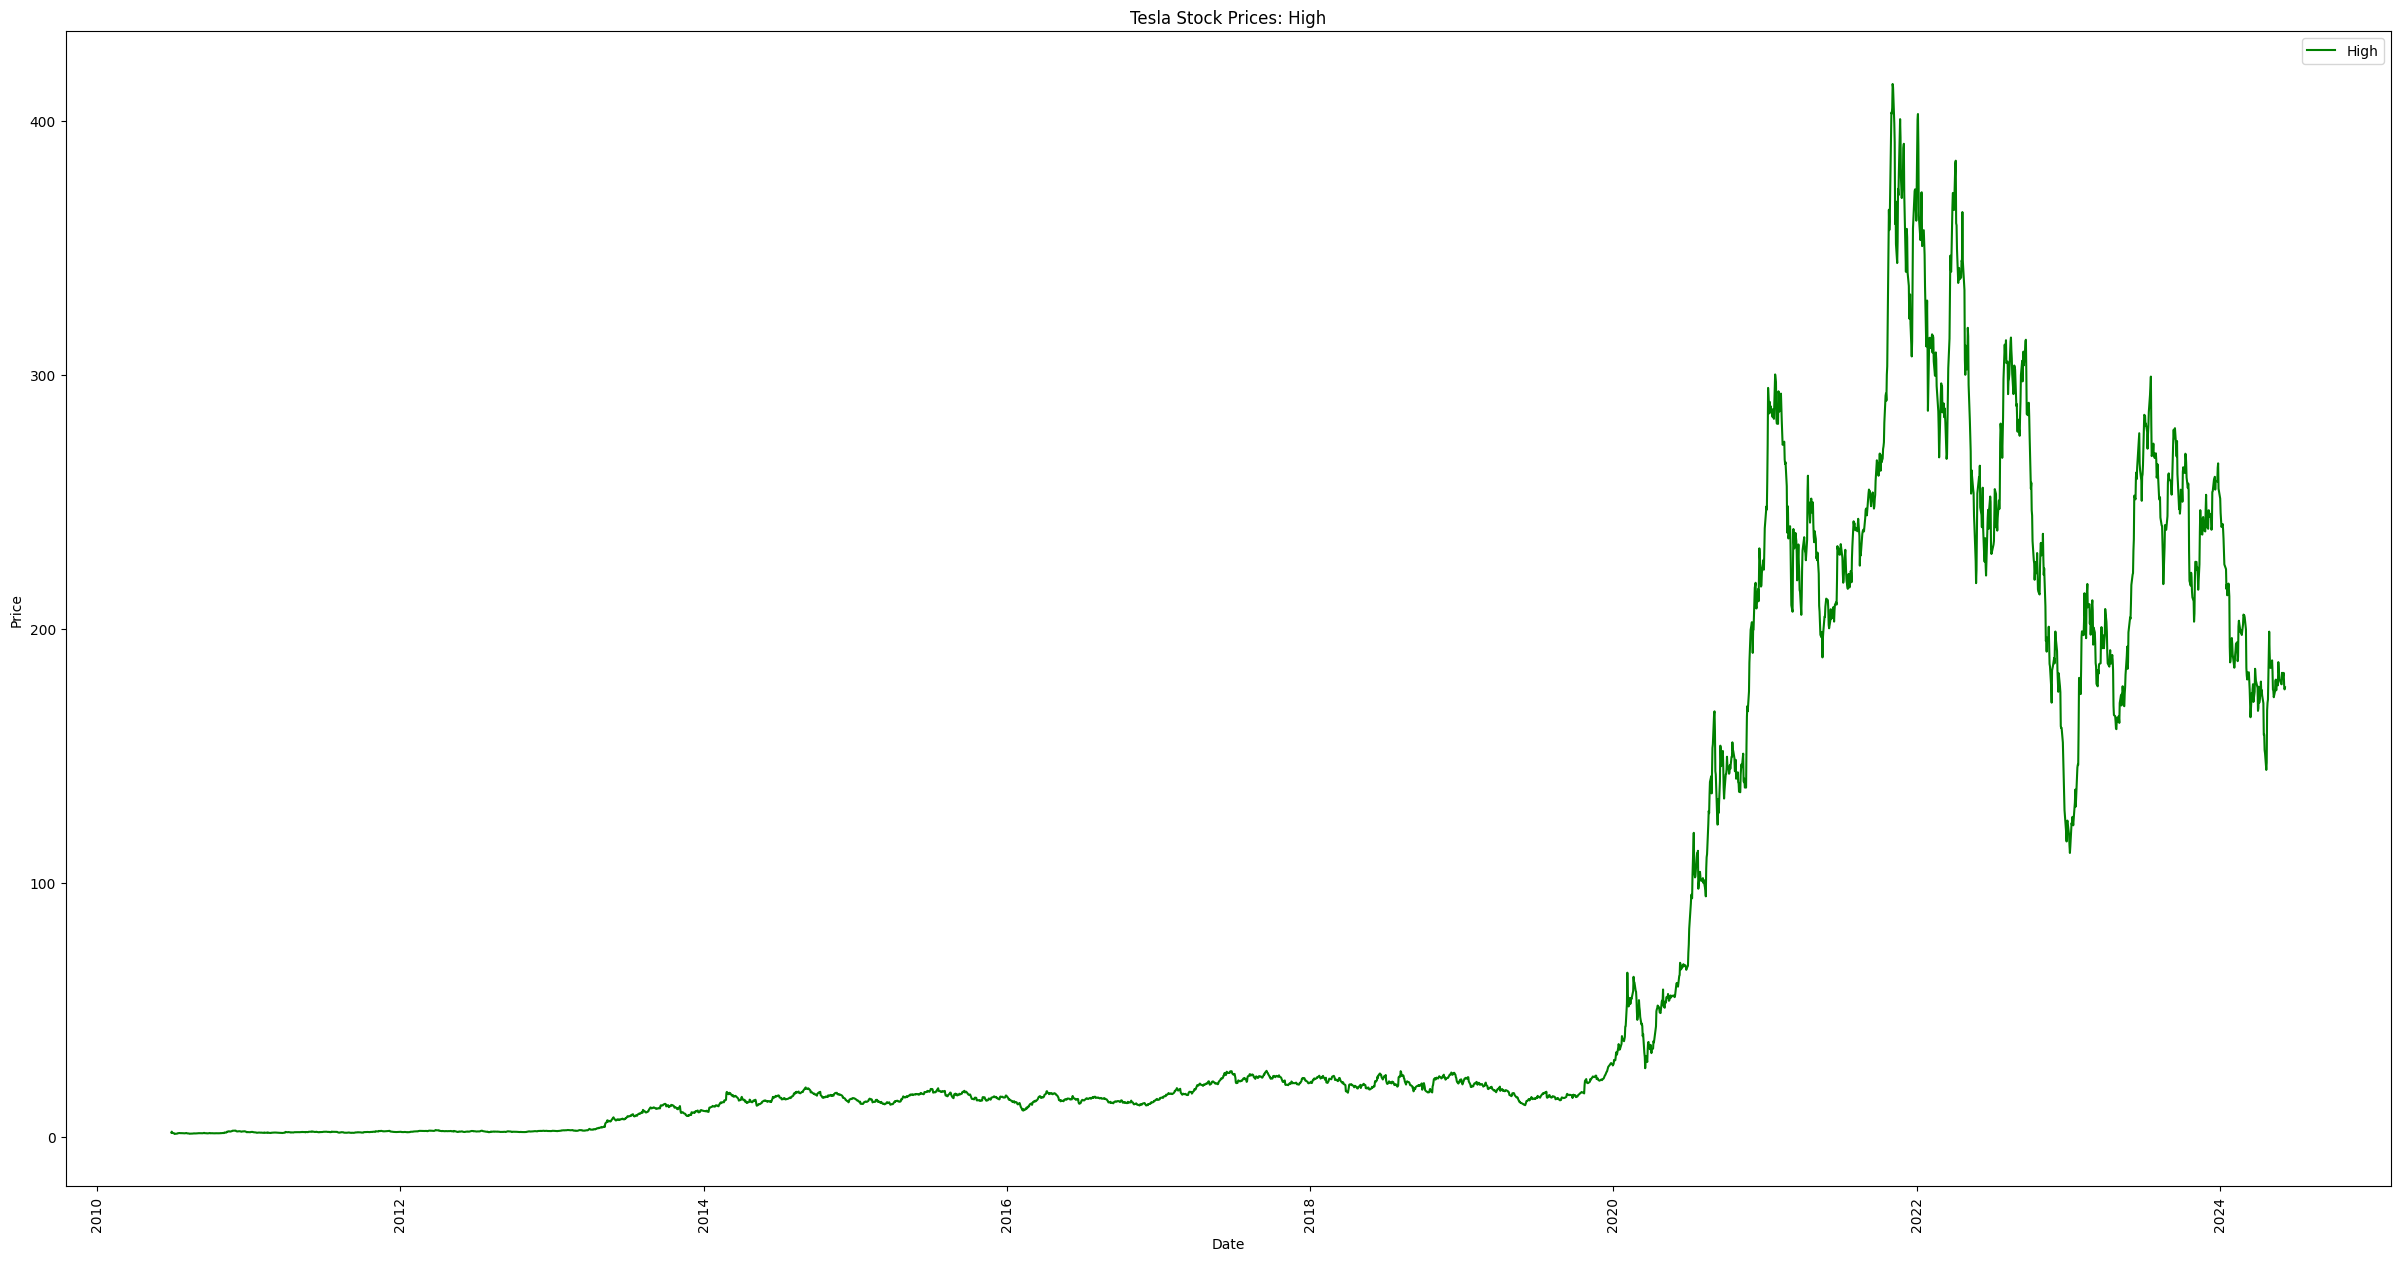

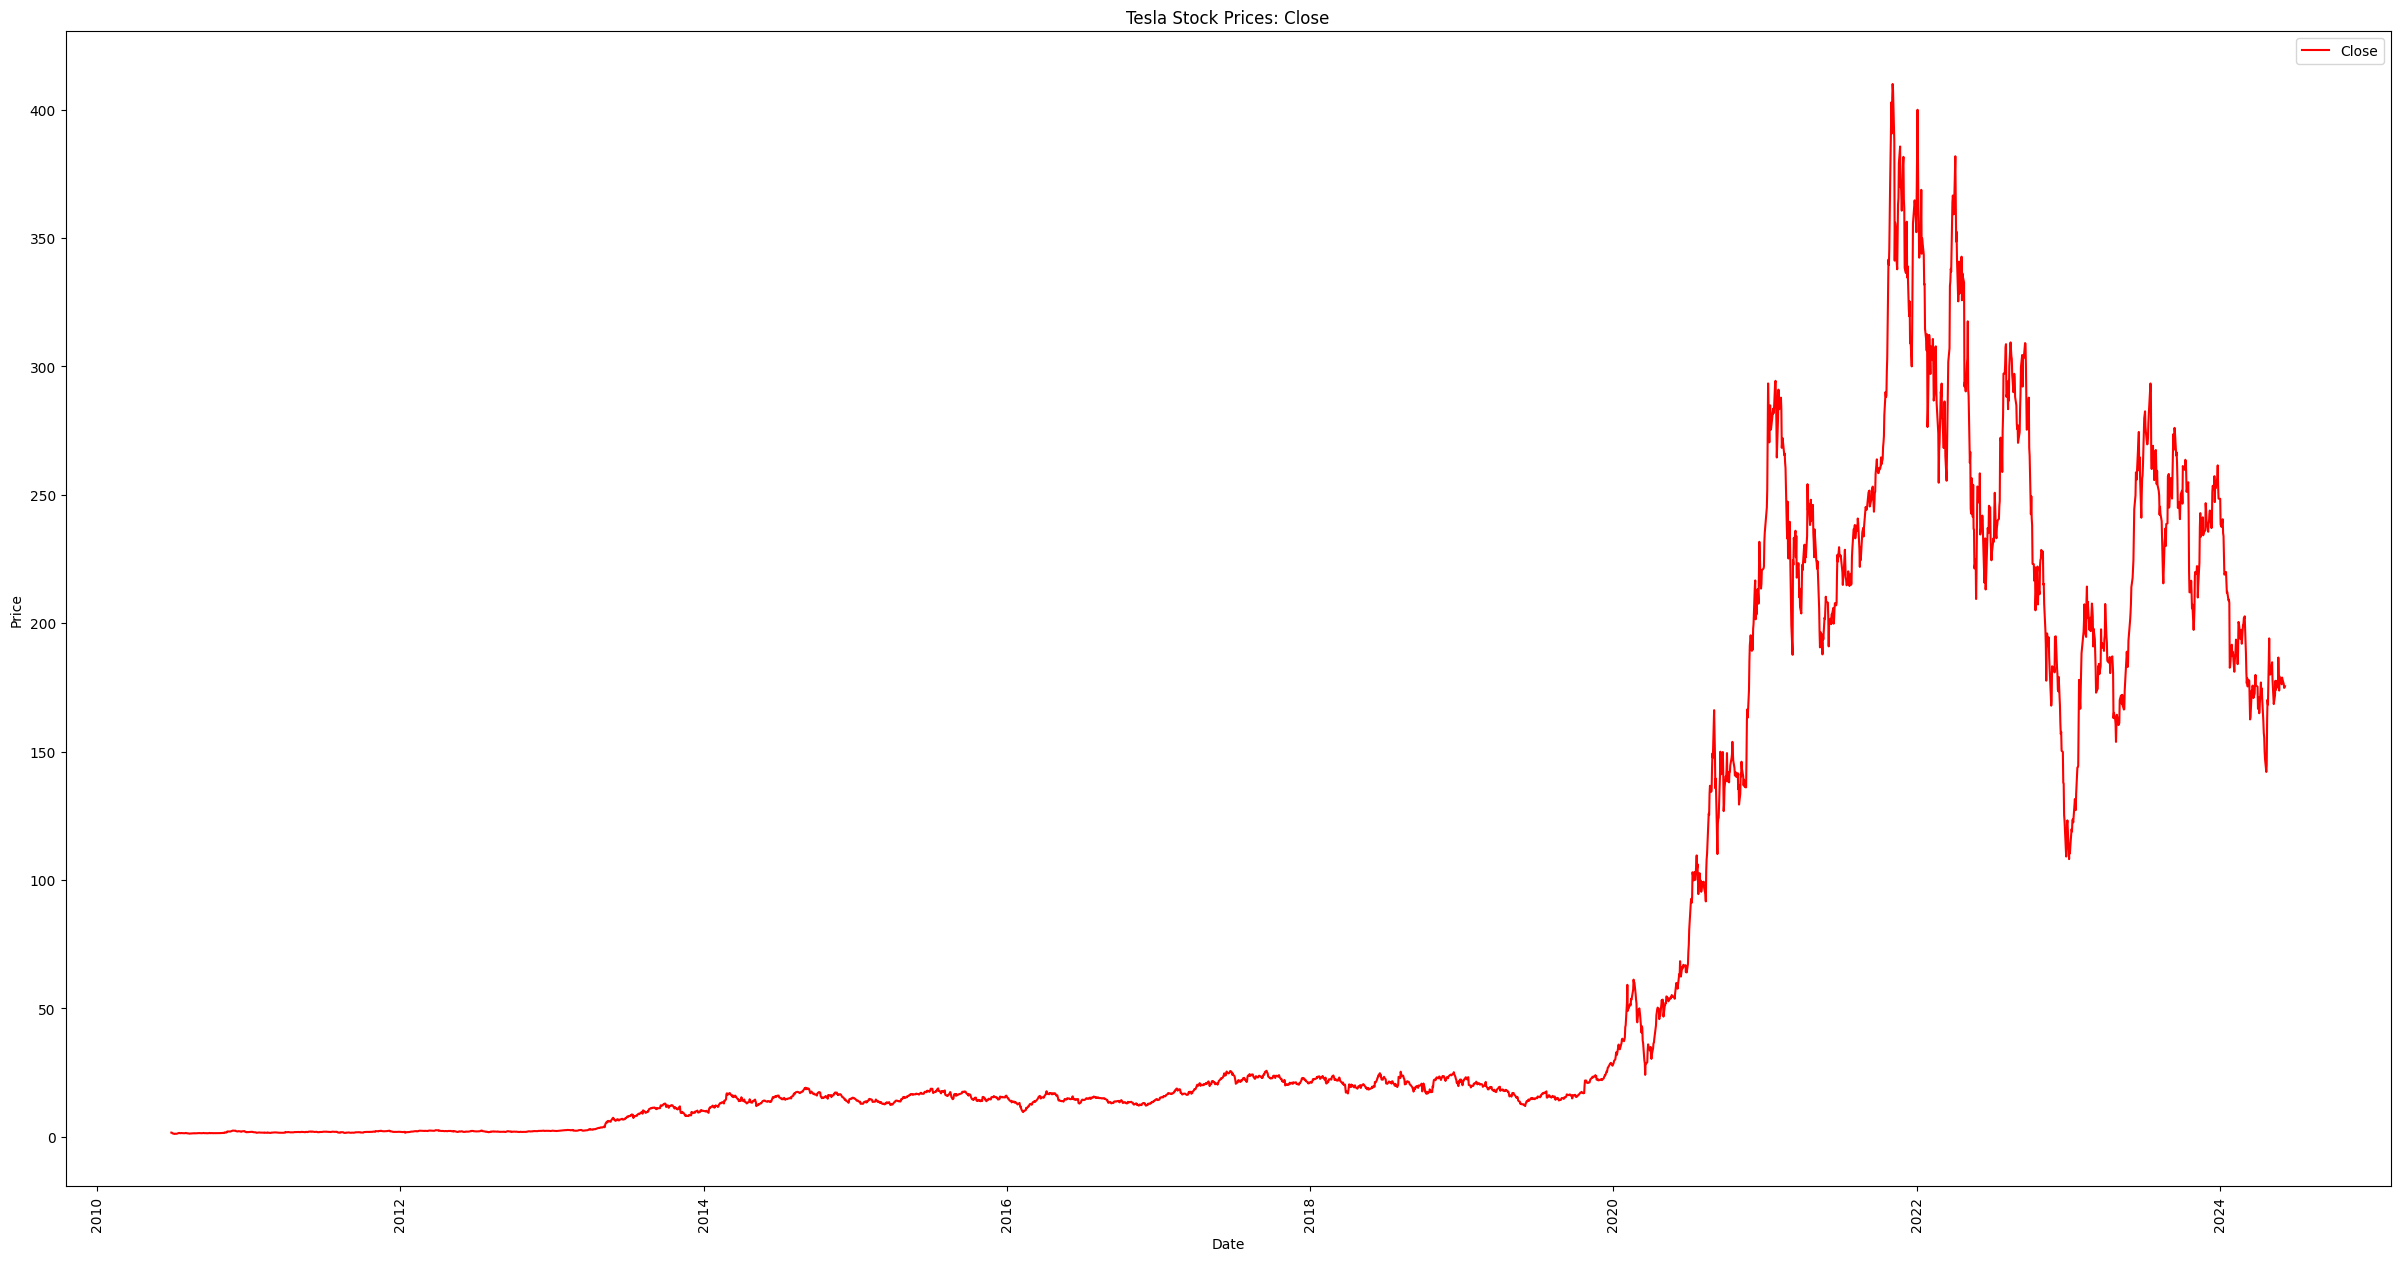

In [22]:
import matplotlib.pyplot as plt
# Plot the 'Open' prices
plt.figure(figsize=(30, 15))
plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Prices: Open')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plot the 'High' prices
plt.figure(figsize=(30, 15))
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Prices: High')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plot the 'Close' prices
plt.figure(figsize=(30, 15))
plt.plot(df['Date'], df['Close'], label='Close', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Prices: Close')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [26]:
df['Daily Change (%)'] = df['Close'].pct_change() * 100
df['Amount of Change'] = df['Close'].diff()

significant_increases = df[df['Daily Change (%)'] >= 5][['Date', 'Amount of Change']]
significant_reductions = df[df['Daily Change (%)'] <= -5][['Date', 'Amount of Change']]

print(significant_increases.head())
print(significant_reductions.head())

         Date  Amount of Change
6  2010-07-08          0.110667
9  2010-07-13          0.072666
10 2010-07-14          0.113334
13 2010-07-19          0.084667
38 2010-08-23          0.068667
         Date  Amount of Change
2  2010-07-01         -0.124667
3  2010-07-02         -0.184000
4  2010-07-06         -0.206000
14 2010-07-20         -0.107334
30 2010-08-11         -0.075334


In [27]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Change (%),Amount of Change
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-0.251151,-0.004000
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-7.847271,-0.124667
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-12.568306,-0.184000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-16.093750,-0.206000


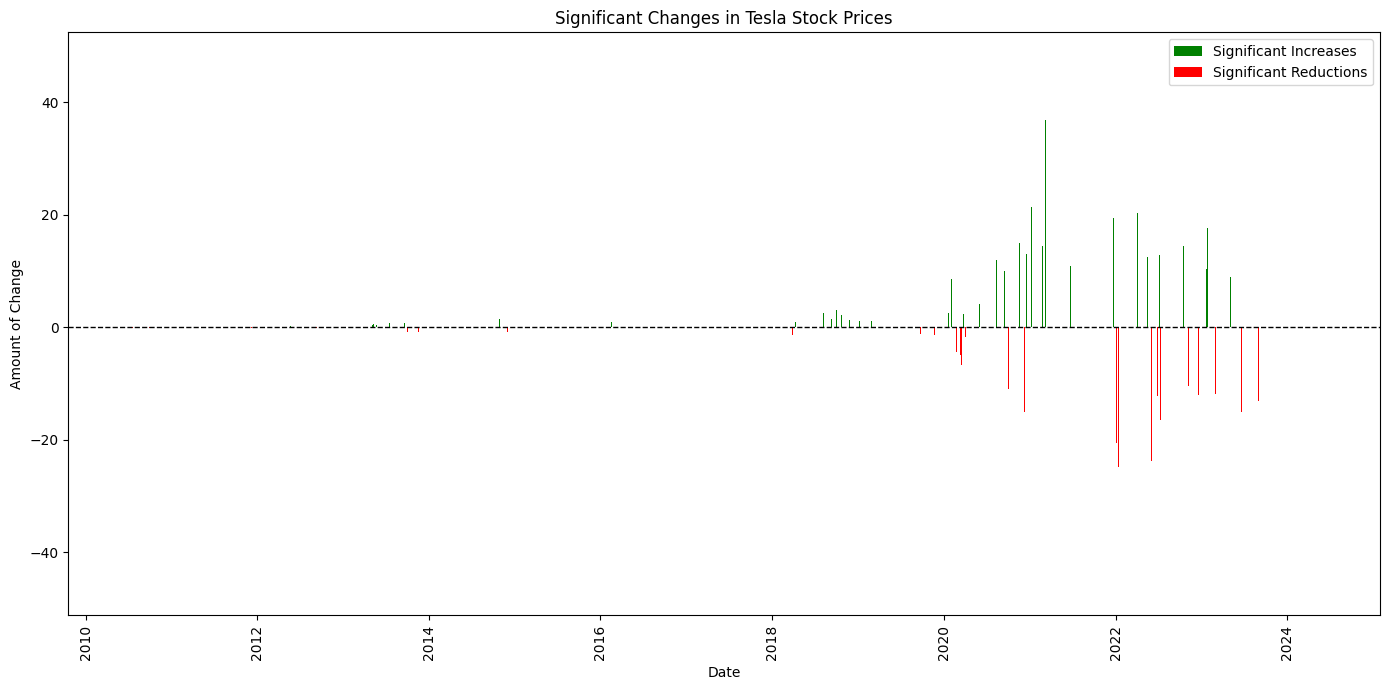

In [28]:
plt.figure(figsize=(14, 7))
plt.bar(significant_increases['Date'], significant_increases['Amount of Change'], color='green', linewidth=2, label='Significant Increases')
plt.bar(significant_reductions['Date'], significant_reductions['Amount of Change'], color='red',linewidth=2, label='Significant Reductions')
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.xlabel('Date')
plt.ylabel('Amount of Change')
plt.title('Significant Changes in Tesla Stock Prices')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define features and target variable
features = ["Open", "High", "Low", "Volume"]
X = df[features]
y = df["Close"]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = r2_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy Score: {rf_accuracy}")

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_accuracy = r2_score(y_test, lr_y_pred)
print(f"Linear Regression Accuracy Score: {lr_accuracy}")

# Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = r2_score(y_test, gb_y_pred)
print(f"Gradient Boosting Accuracy Score: {gb_accuracy}")

Random Forest Accuracy Score: 0.9995072773732023
Linear Regression Accuracy Score: 0.9997525281522605
Gradient Boosting Accuracy Score: 0.9994461175870408


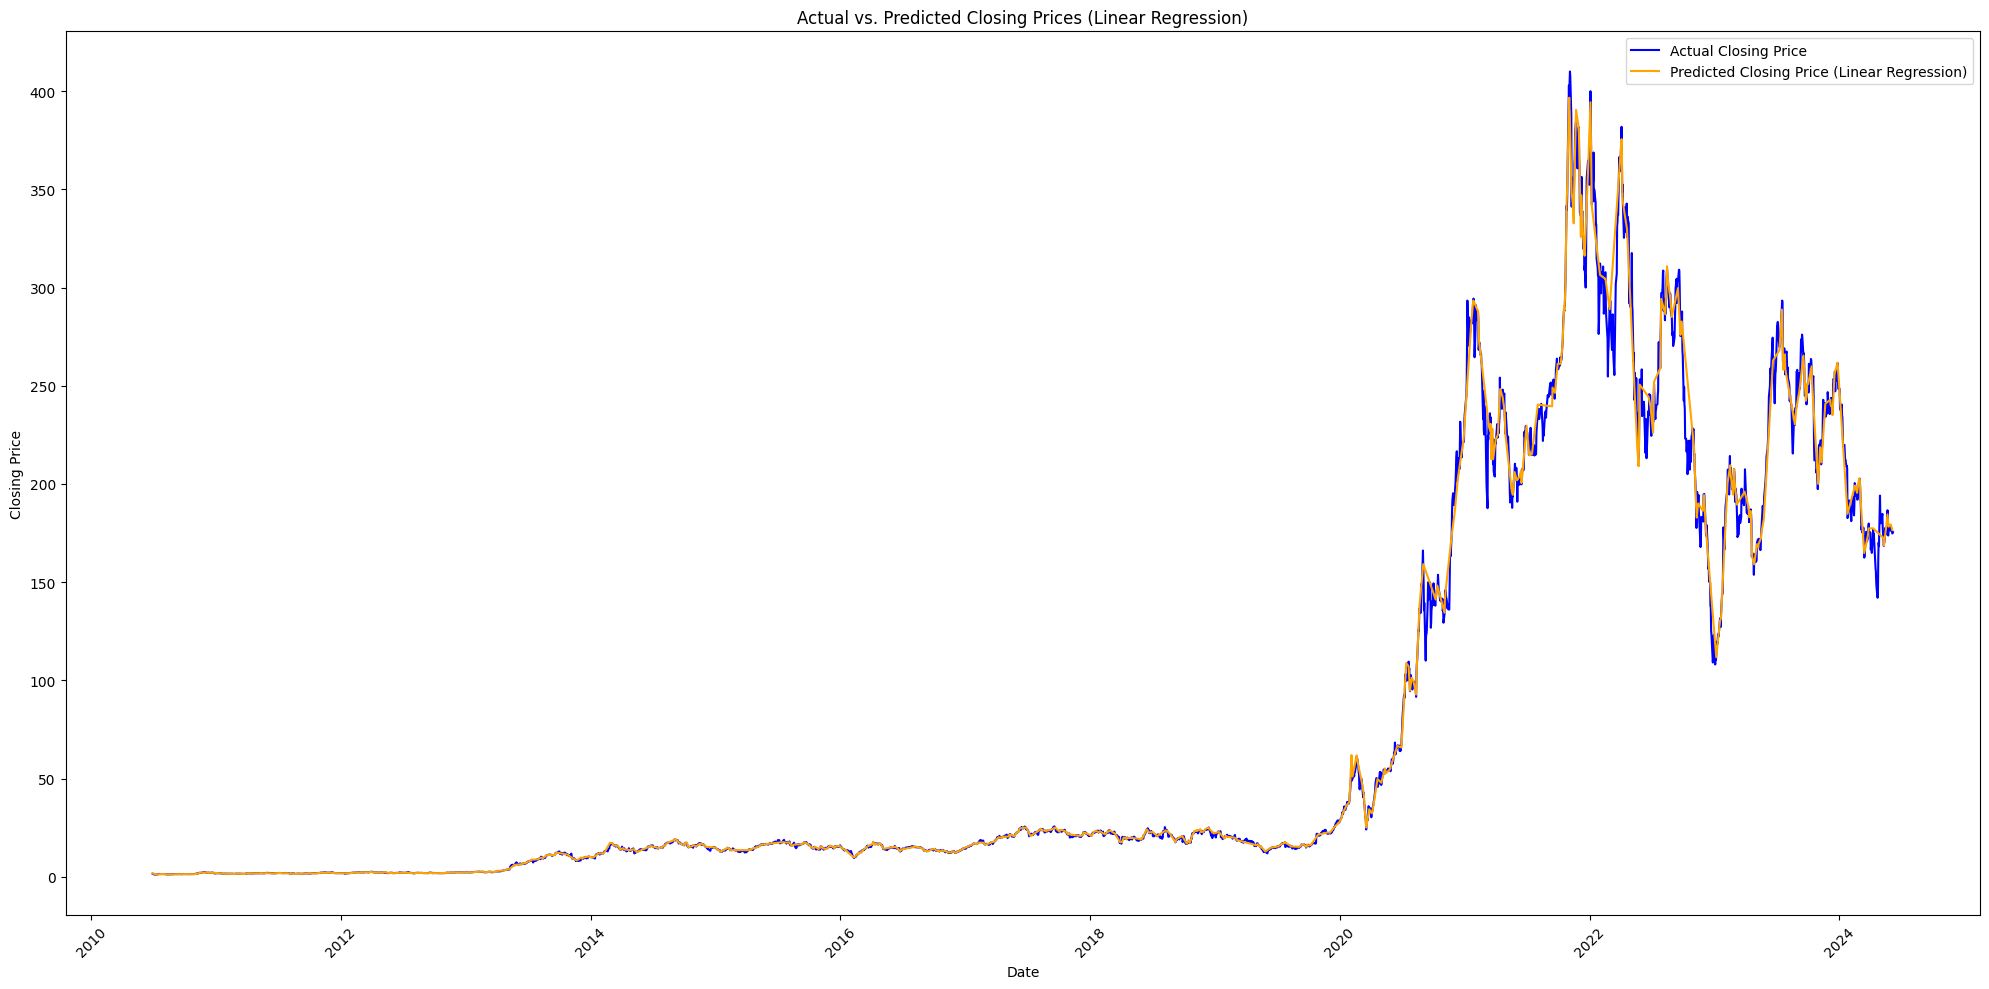

In [36]:
dates_test = df.iloc[X_test.index]["Date"]
prediction_df = pd.DataFrame({"Date": dates_test, "Actual": y_test, "Predicted": lr_y_pred})
prediction_df.sort_values("Date", inplace=True)

plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Close"], label="Actual Closing Price", color='blue')
plt.plot(prediction_df["Date"], prediction_df["Predicted"], label="Predicted Closing Price (Linear Regression)", color='orange')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Prices (Linear Regression)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

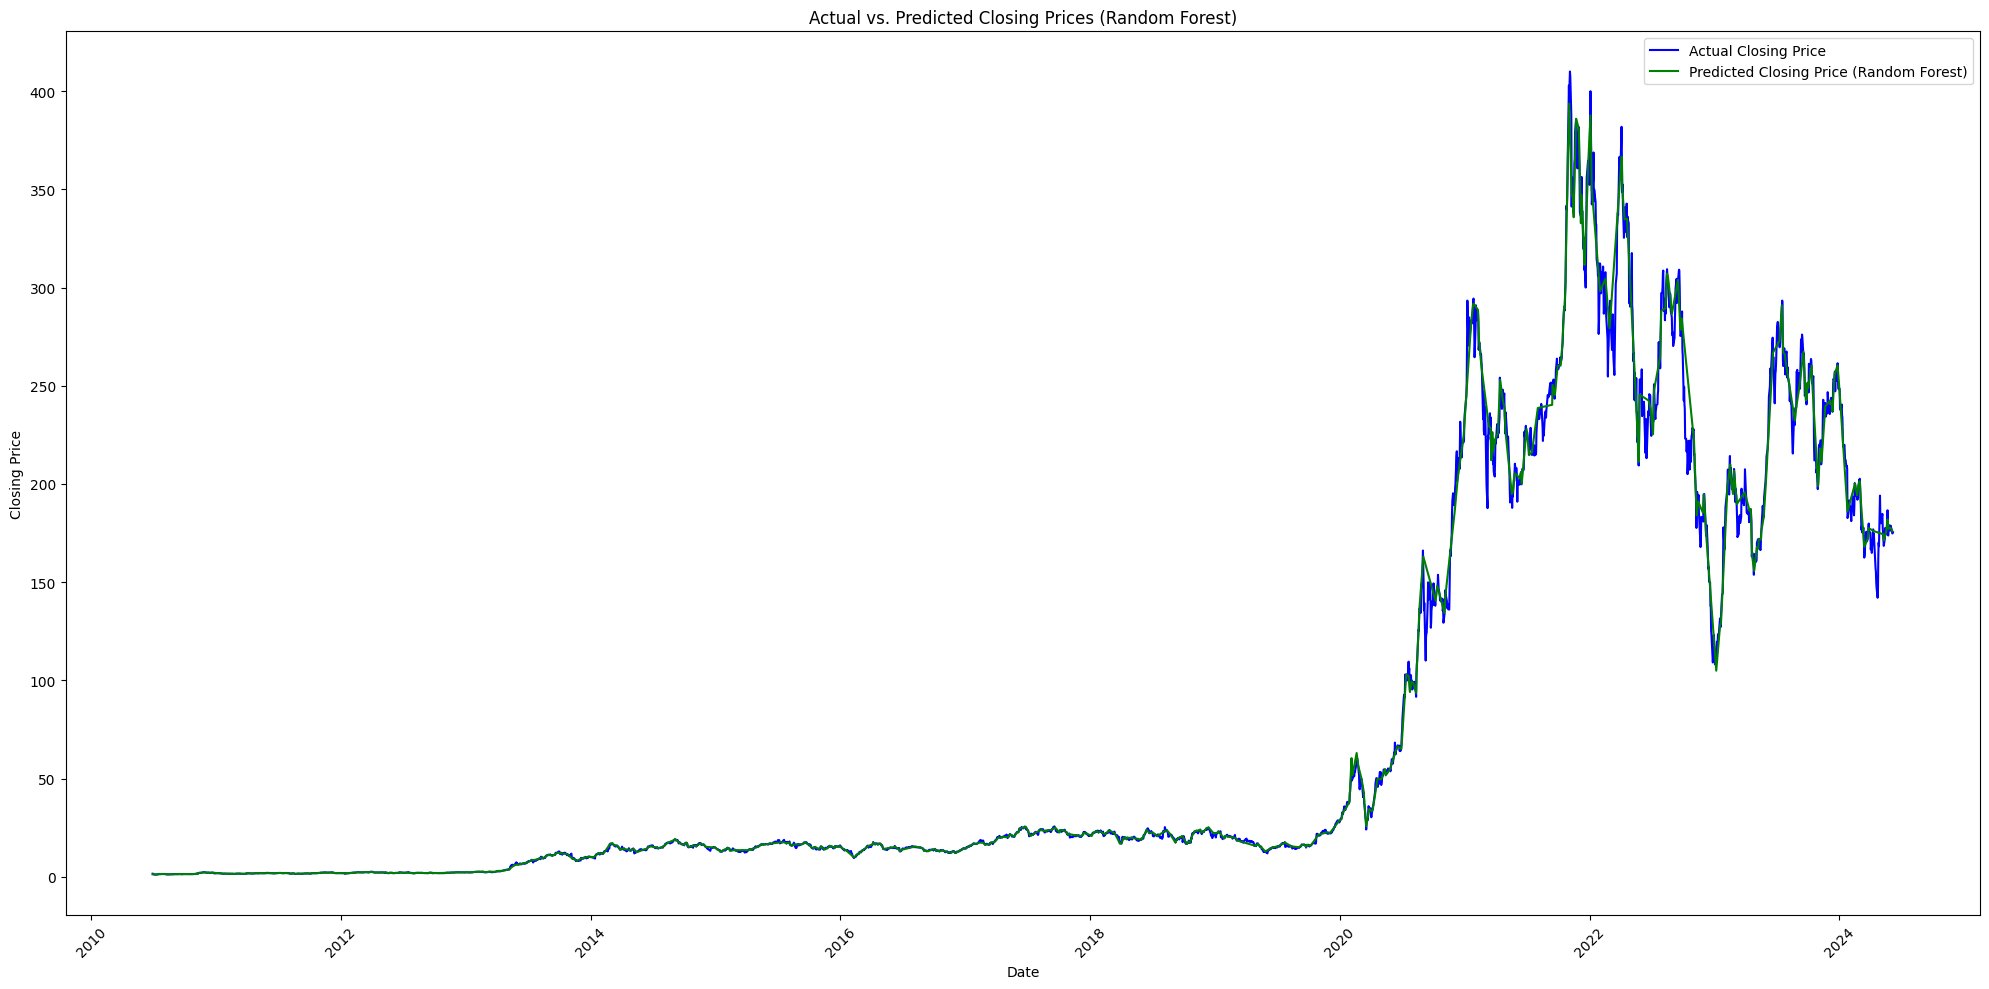

In [35]:
dates_test = df.iloc[X_test.index]["Date"]
prediction_df = pd.DataFrame({"Date": dates_test, "Actual": y_test, "Predicted": rf_y_pred})
prediction_df.sort_values("Date", inplace=True)

plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Close"], label="Actual Closing Price", color='blue')
plt.plot(prediction_df["Date"], prediction_df["Predicted"], label="Predicted Closing Price (Random Forest)", color='green')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Prices (Random Forest)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()